In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\Jyothi Nair\Desktop\AI-ML\Datasets\cars-1.csv')

In [3]:
data.head()

mpg  cylinders cubicinches   hp weightlbs  time-to-60  year     brand
0  14.0          8         350  165      4209          12  1972       US.
1  31.9          4          89   71      1925          14  1980   Europe.
2  17.0          8         302  140      3449          11  1971       US.
3  15.0          8         400  150      3761          10  1971       US.
4  30.5          4          98   63      2051          17  1978       US.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [12]:
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors = 'coerce')
data['weightlbs'] = data['weightlbs'].fillna(0)
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors = 'coerce')
data['weightlbs'] = data['weightlbs'].fillna(0)

In [8]:
data.shape

(261, 8)

In [13]:
data.describe()

mpg   cylinders  cubicinches          hp    weightlbs  \
count  261.000000  261.000000   259.000000  261.000000   261.000000   
mean    23.144828    5.590038   200.918919  106.360153  2975.237548   
std      7.823570    1.733310   109.258305   40.499959   907.905975   
min     10.000000    3.000000    68.000000   46.000000     0.000000   
25%     16.900000    4.000000    99.500000   75.000000  2230.000000   
50%     22.000000    6.000000   156.000000   95.000000  2830.000000   
75%     28.800000    8.000000   303.000000  138.000000  3664.000000   
max     46.600000    8.000000   455.000000  230.000000  4997.000000   

       time-to-60         year  
count  261.000000   261.000000  
mean    15.547893  1976.819923  
std      2.910625     3.637696  
min      8.000000  1971.000000  
25%     14.000000  1974.000000  
50%     16.000000  1977.000000  
75%     17.000000  1980.000000  
max     25.000000  1983.000000

In [56]:
#Dividing 'weightlbs' by 100 to bring the data in a similar range, from thousands to hundreds:
data['weightlbs'] = data['weightlbs'].div(1000)
data.head()

mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year     brand
0  14.0          8        350.0  165     4209.0          12  1972       US.
1  31.9          4         89.0   71     1925.0          14  1980   Europe.
2  17.0          8        302.0  140     3449.0          11  1971       US.
3  15.0          8        400.0  150     3761.0          10  1971       US.
4  30.5          4         98.0   63     2051.0          17  1978       US.

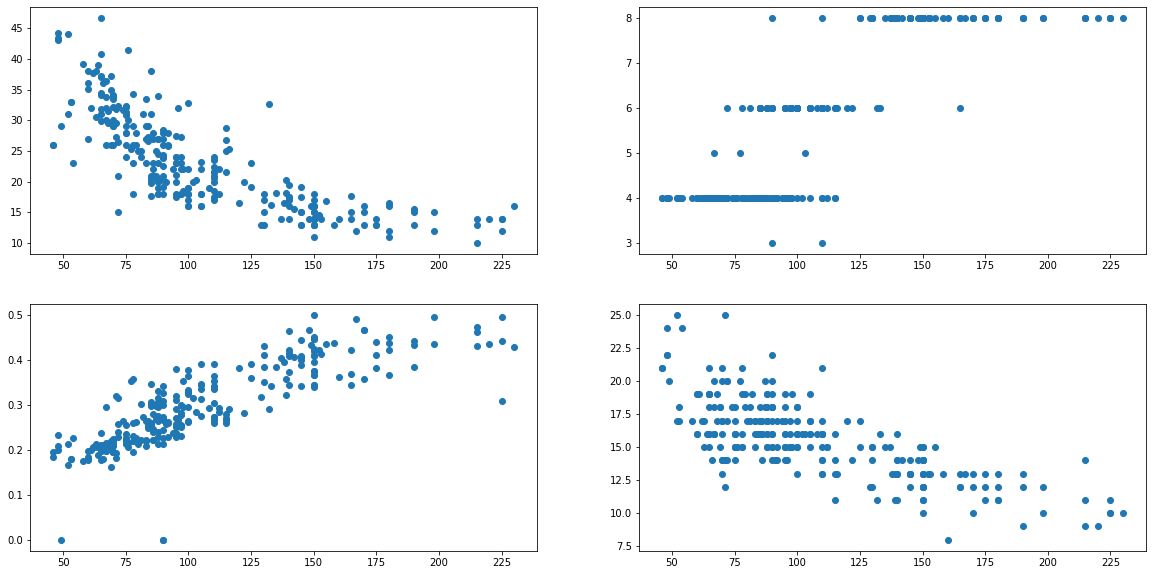

In [17]:
from seaborn.relational import scatterplot
#Scatter plotting w.r.t. hp:
fig, axes = plt.subplots(2,2, figsize = (20,10))
x = data['hp']
a1 = data['mpg']
a2 = data['cylinders']
a3 = data['weightlbs']
a4 = data['time-to-60']

axes[0][0].scatter(x,a1)
axes[0][1].scatter(x,a2)
axes[1][0].scatter(x,a3)
axes[1][1].scatter(x,a4)

In [18]:
data.corr()

mpg  cylinders  cubicinches        hp  weightlbs  \
mpg          1.000000  -0.776710    -0.803964 -0.774905  -0.769895   
cylinders   -0.776710   1.000000     0.951452  0.845155   0.842176   
cubicinches -0.803964   0.951452     1.000000  0.906902   0.880082   
hp          -0.774905   0.845155     0.906902  1.000000   0.829966   
weightlbs   -0.769895   0.842176     0.880082  0.829966   1.000000   
time-to-60   0.509070  -0.578161    -0.613199 -0.744873  -0.478553   
year         0.550441  -0.322239    -0.350293 -0.383869  -0.245000   

             time-to-60      year  
mpg            0.509070  0.550441  
cylinders     -0.578161 -0.322239  
cubicinches   -0.613199 -0.350293  
hp            -0.744873 -0.383869  
weightlbs     -0.478553 -0.245000  
time-to-60     1.000000  0.312311  
year           0.312311  1.000000

<AxesSubplot:xlabel='mpg', ylabel='cylinders'>

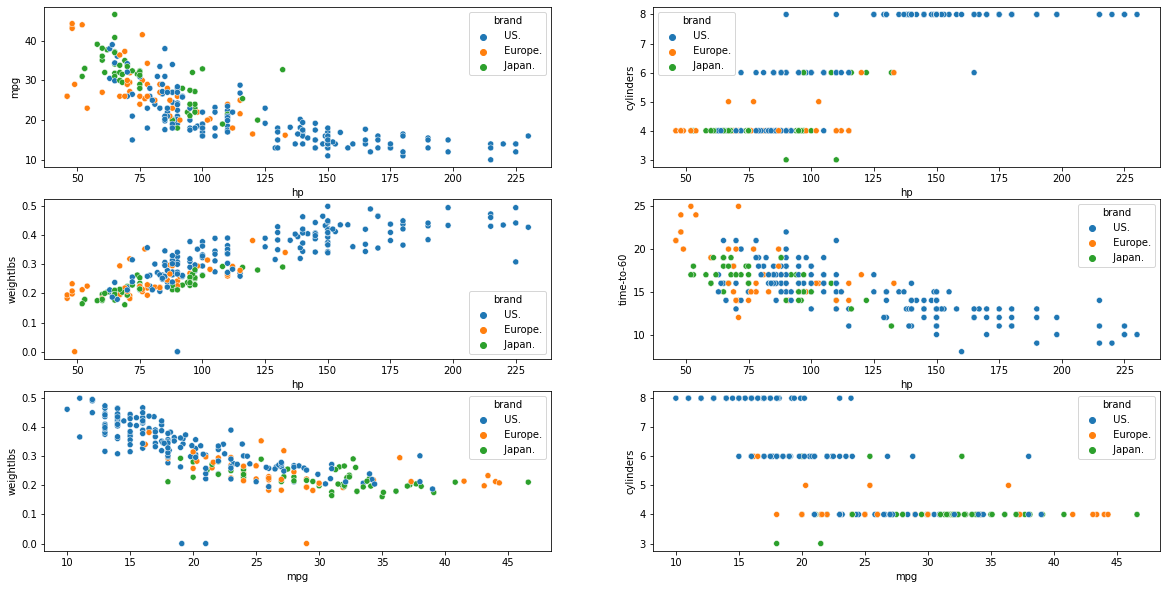

In [35]:
#Scatterplots with Seaborn:

fig, axes = plt.subplots(3,2, figsize = (20,10)) #Skeletal framework of the plots, creates 3*2 = 6 different subplots on the grid

plt.subplot(3,2,1)
sns.scatterplot(x=data['hp'], y =data['mpg'], hue = data['brand'], data=data)
plt.subplot(3,2,2)
sns.scatterplot(x=data['hp'], y = data['cylinders'], hue = data['brand'], data=data)
plt.subplot(3,2,3)
sns.scatterplot(x=data['hp'], y = data['weightlbs'], hue= data['brand'], data=data)
plt.subplot(3,2,4)
sns.scatterplot(x=data['hp'], y = data['time-to-60'], hue = data['brand'], data=data)
plt.subplot(3,2,5)
sns.scatterplot(x=data['mpg'], y = data['weightlbs'], hue=data['brand'], data=data)
plt.subplot(3,2,6)
sns.scatterplot(x=data['mpg'], y = data['cylinders'], hue=data['brand'], data=data)


Text(0, 0.5, 'Cubic Inches')

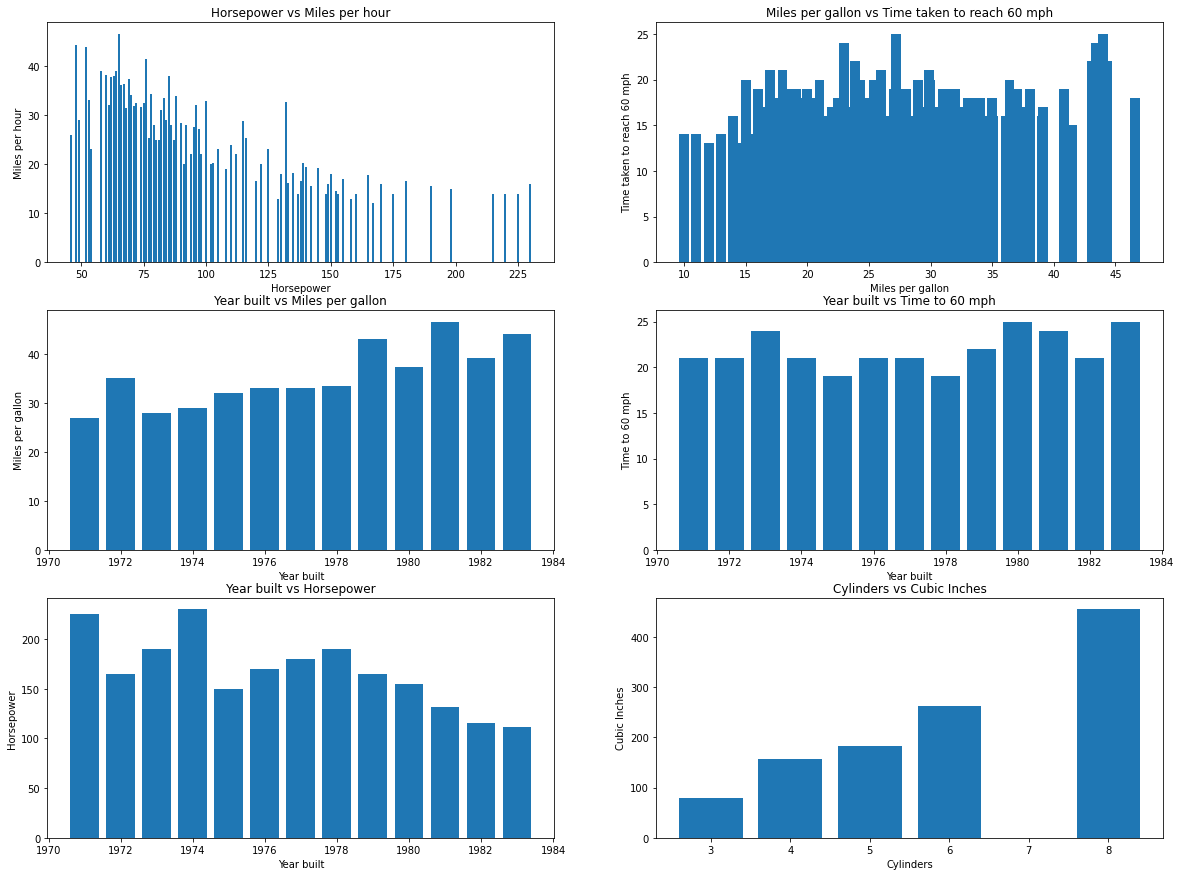

In [59]:
#Bar plots using matplotlib:
plt.subplots(3,2, figsize = (20,15))
b1 = data['hp']
b2 = data['mpg']
b3 = data['time-to-60']
b4 = data['weightlbs']
b5 = data['cylinders']
b6 = data['year']
b7 = data['cubicinches']

plt.subplot(3,2,1)
plt.bar(b1,b2)
plt.title('Horsepower vs Miles per hour')
plt.xlabel('Horsepower')
plt.ylabel('Miles per hour')

plt.subplot(3,2,2)
plt.bar(b2,b3)
plt.title('Miles per gallon vs Time taken to reach 60 mph')
plt.xlabel('Miles per gallon')
plt.ylabel('Time taken to reach 60 mph')

plt.subplot(3,2,3)
plt.bar(b6,b2)
plt.title('Year built vs Miles per gallon')
plt.xlabel('Year built')
plt.ylabel('Miles per gallon')

plt.subplot(3,2,4)
plt.bar(b6,b3)
plt.title('Year built vs Time to 60 mph')
plt.xlabel('Year built')
plt.ylabel('Time to 60 mph')

plt.subplot(3,2,5)
plt.bar(b6,b1)
plt.title('Year built vs Horsepower')
plt.xlabel('Year built')
plt.ylabel('Horsepower')

plt.subplot(3,2,6)
plt.bar(b5,b7)
plt.title('Cylinders vs Cubic Inches')
plt.xlabel('Cylinders')
plt.ylabel('Cubic Inches')

<AxesSubplot:xlabel='cylinders', ylabel='cubicinches'>

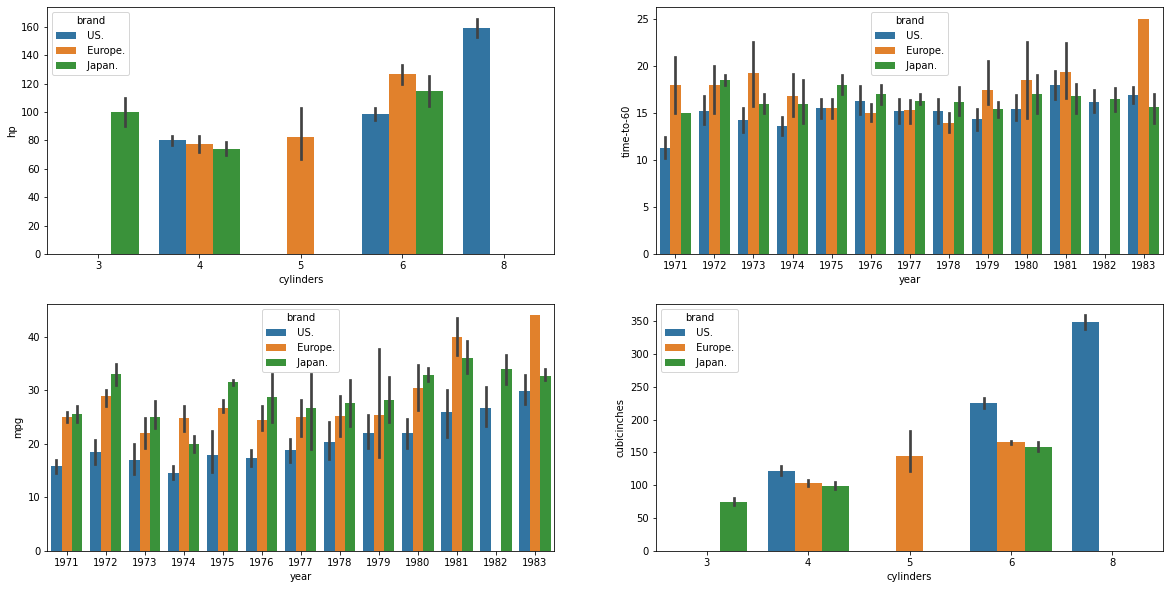

In [66]:
#Barplots using Seaborn:
fig, axes = plt.subplots(2,2, figsize =(20,10))

plt.subplot(2,2,1)
sns.barplot(x=data['cylinders'], y=data['hp'], hue=data['brand'])

plt.subplot(2,2,2)
sns.barplot(x=data['year'], y=data['time-to-60'], hue=data['brand'])

plt.subplot(2,2,3)
sns.barplot(x=data['year'], y=data['mpg'], hue=data['brand'])

plt.subplot(2,2,4)
sns.barplot(x=data['cylinders'], y=data['cubicinches'], hue=data['brand'])

Text(0.5, 1.0, 'Horsepower')

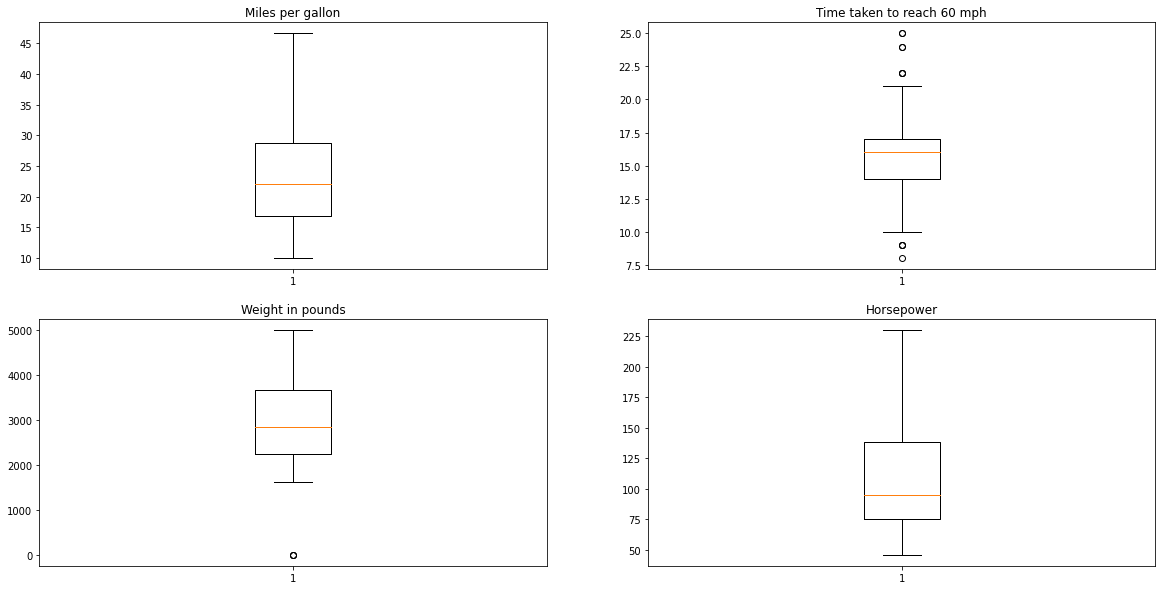

In [76]:
#Boxplots using matplotlib:
fig, axes = plt.subplots(2,2, figsize = (20,10))

plt.subplot(2,2,1)
plt.boxplot(data['mpg'])
plt.title('Miles per gallon')

plt.subplot(2,2,2)
plt.boxplot(data['time-to-60'])
plt.title('Time taken to reach 60 mph')

plt.subplot(2,2,3)
plt.boxplot(data['weightlbs'])
plt.title('Weight in pounds')

plt.subplot(2,2,4)
plt.boxplot(data['hp'])
plt.title('Horsepower')

Text(0, 0.5, 'Horsepower')

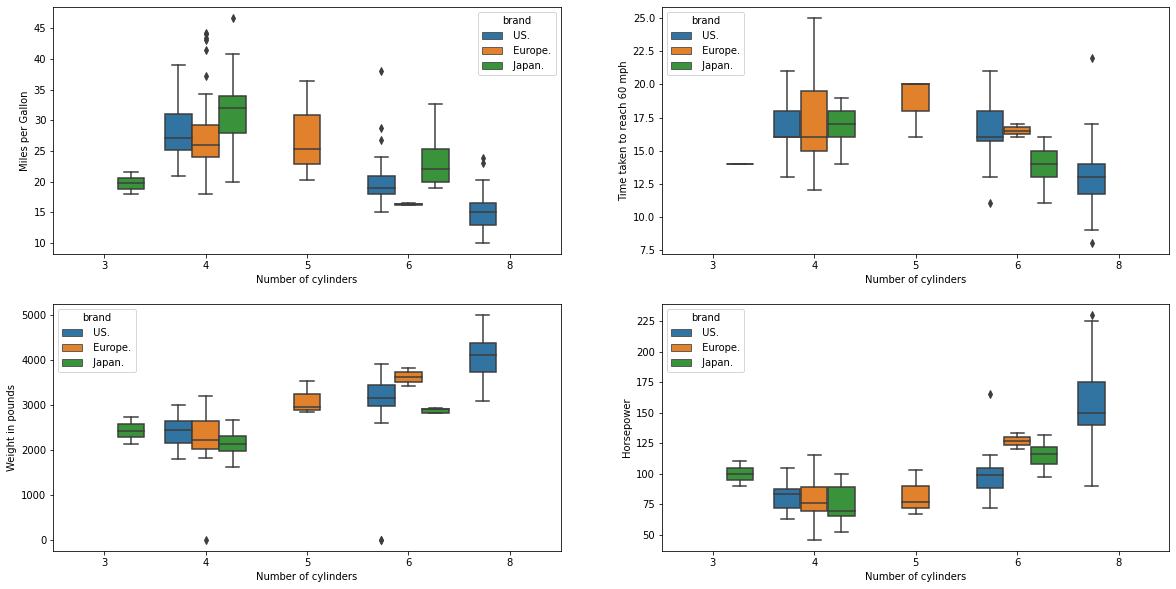

In [80]:
#Boxplots using Seaborn:
fig, axes = plt.subplots(2,2, figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(x=data['cylinders'], y=data['mpg'], hue=data['brand'], data=data)
plt.xlabel('Number of cylinders')
plt.ylabel('Miles per Gallon')

plt.subplot(2,2,2)
sns.boxplot(x=data['cylinders'], y=data['time-to-60'], hue=data['brand'], data=data)
plt.xlabel('Number of cylinders')
plt.ylabel('Time taken to reach 60 mph')

plt.subplot(2,2,3)
sns.boxplot(x=data['cylinders'], y=data['weightlbs'], hue=data['brand'], data=data)
plt.xlabel('Number of cylinders')
plt.ylabel('Weight in pounds')

plt.subplot(2,2,4)
sns.boxplot(x=data['cylinders'], y=data['hp'], hue=data['brand'], data=data)
plt.xlabel('Number of cylinders')
plt.ylabel('Horsepower')

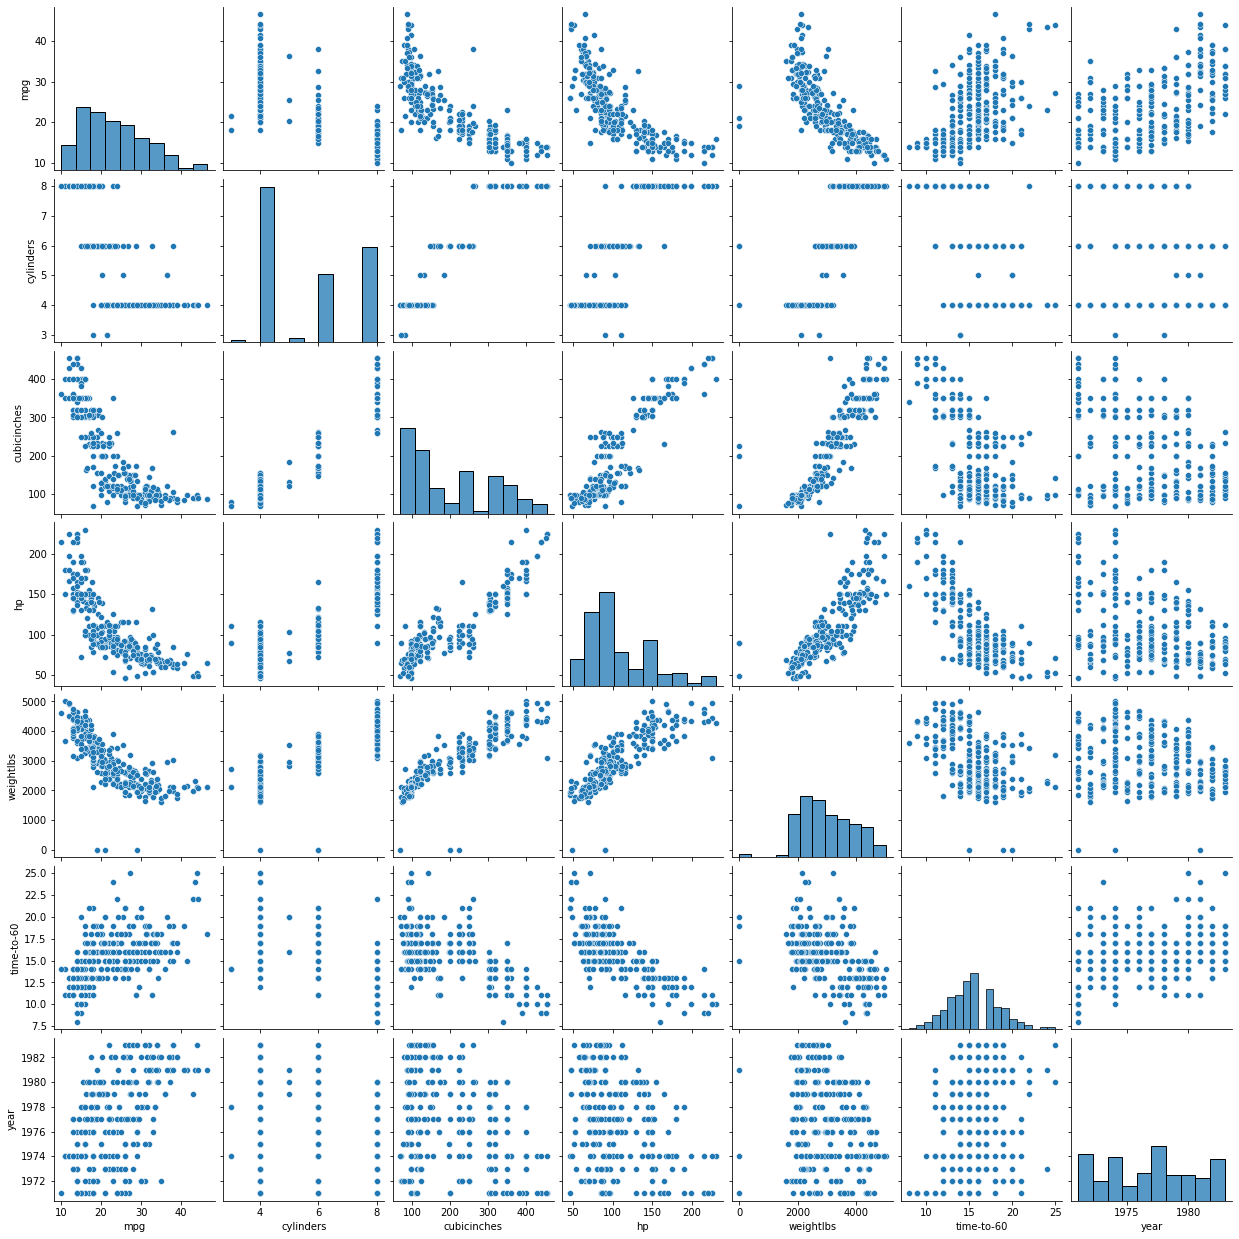

In [83]:
#Pairplots with Seaborn:
sns.pairplot(data)
plt.show()

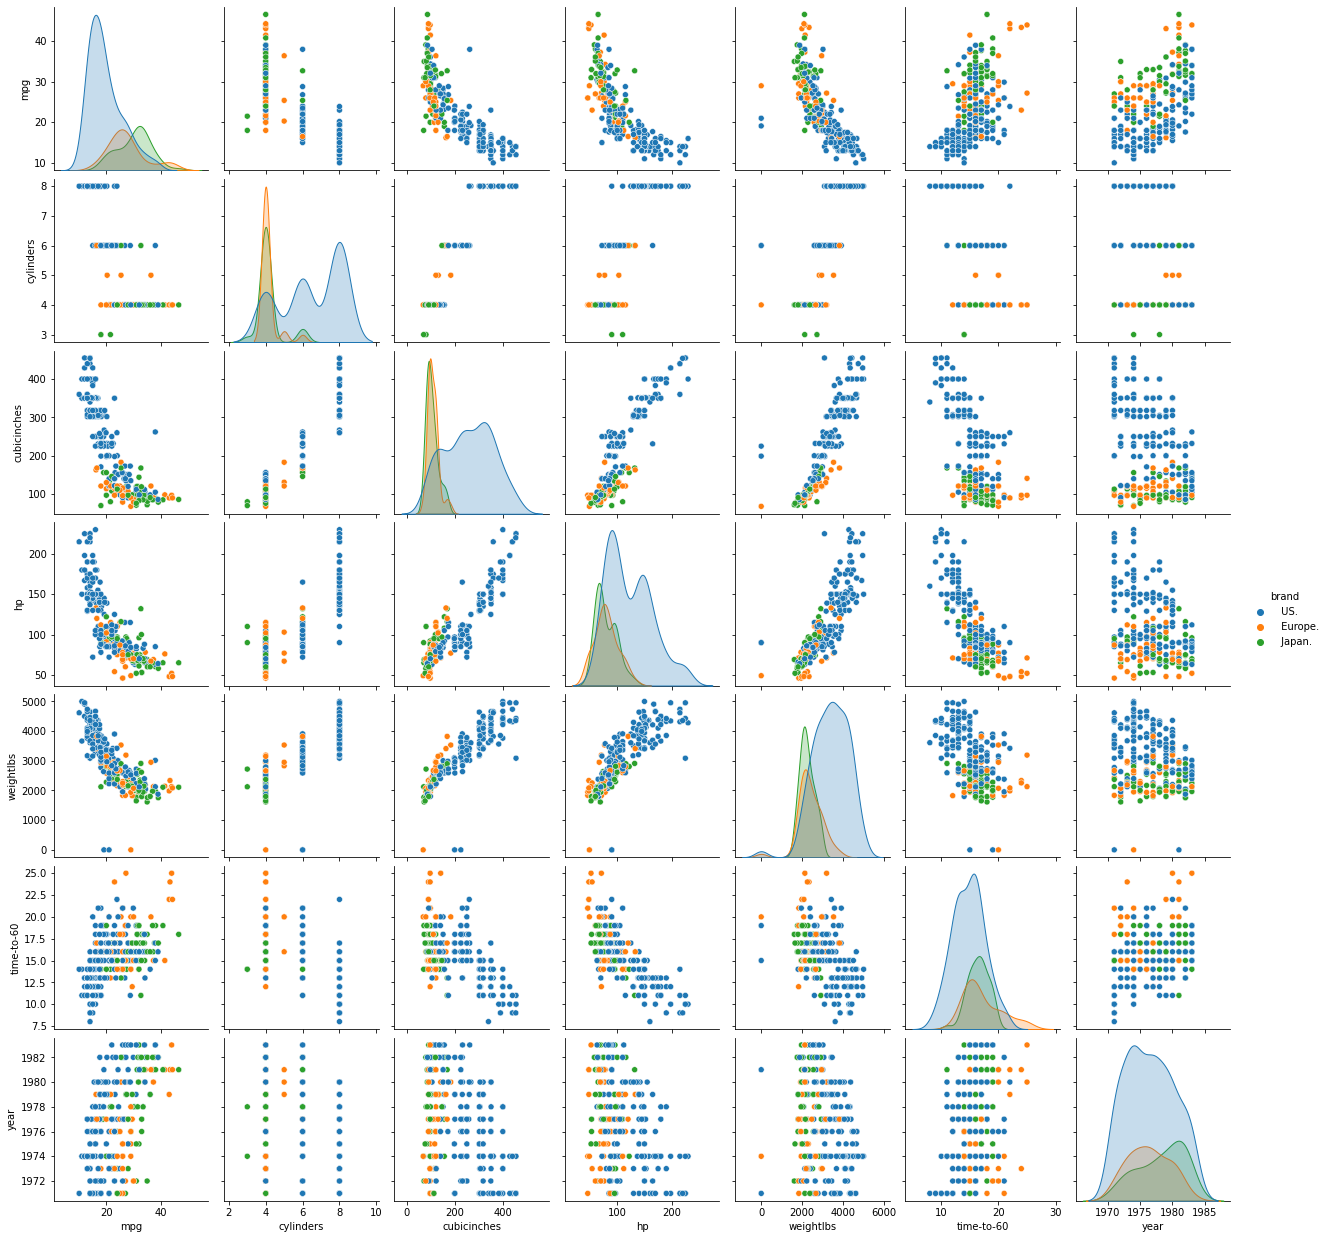

In [84]:
sns.pairplot(data, hue='brand')

c:\Python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


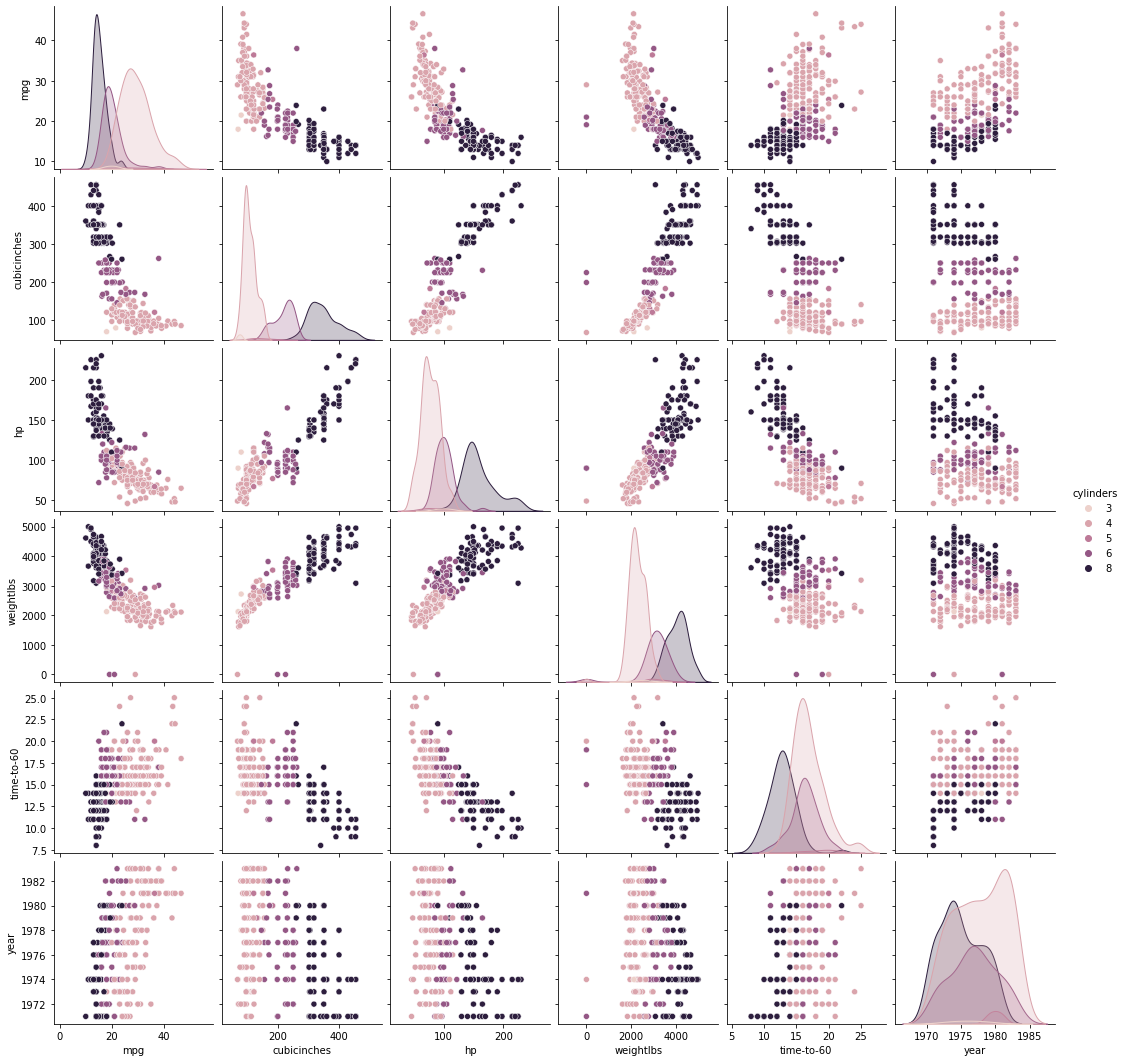

In [85]:
sns.pairplot(data, hue='cylinders')

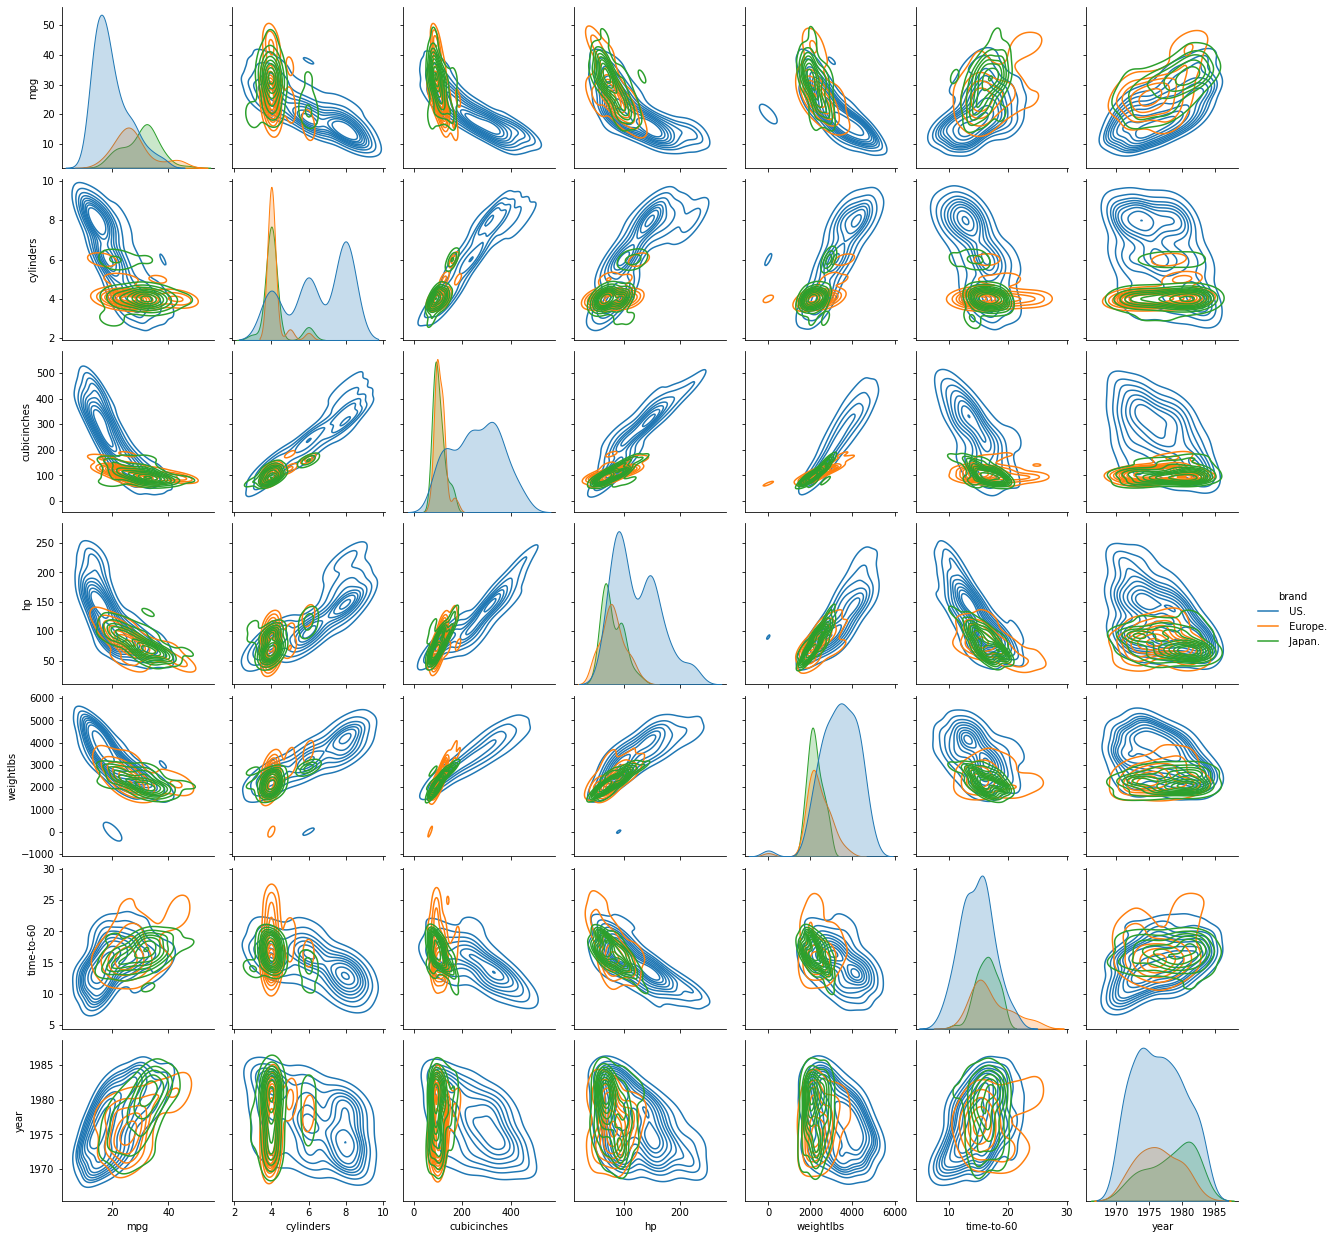

In [87]:
sns.pairplot(data, hue='brand', kind='kde')

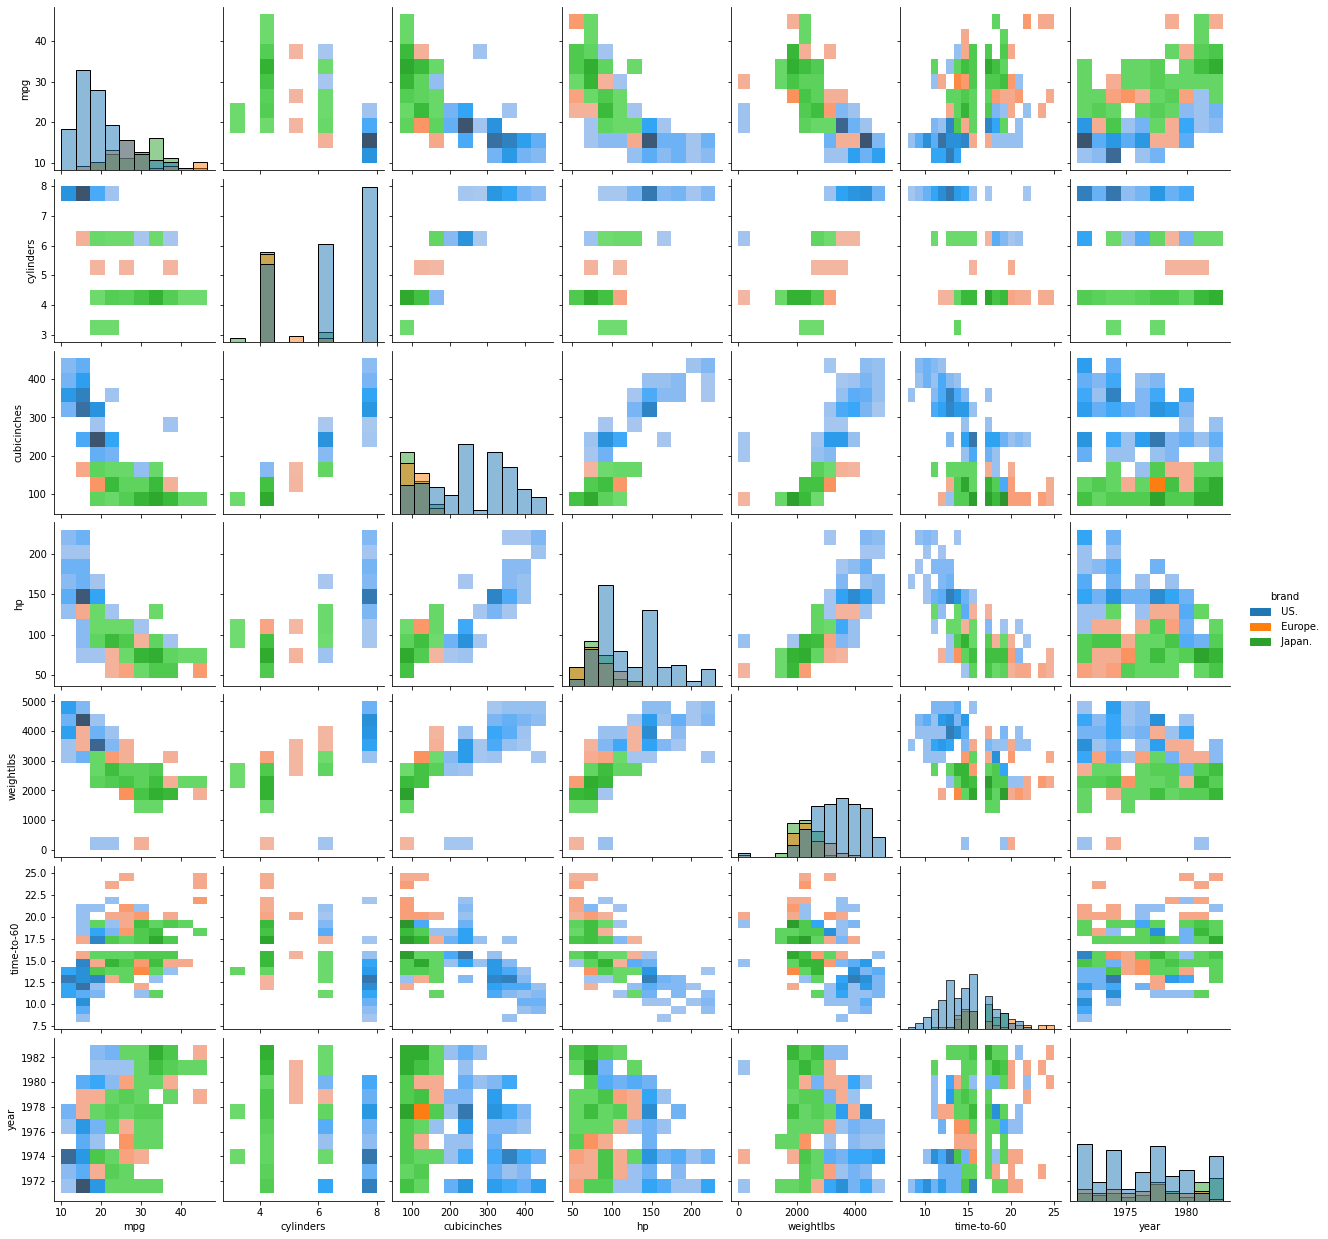

In [88]:
sns.pairplot(data, hue='brand', kind='hist')

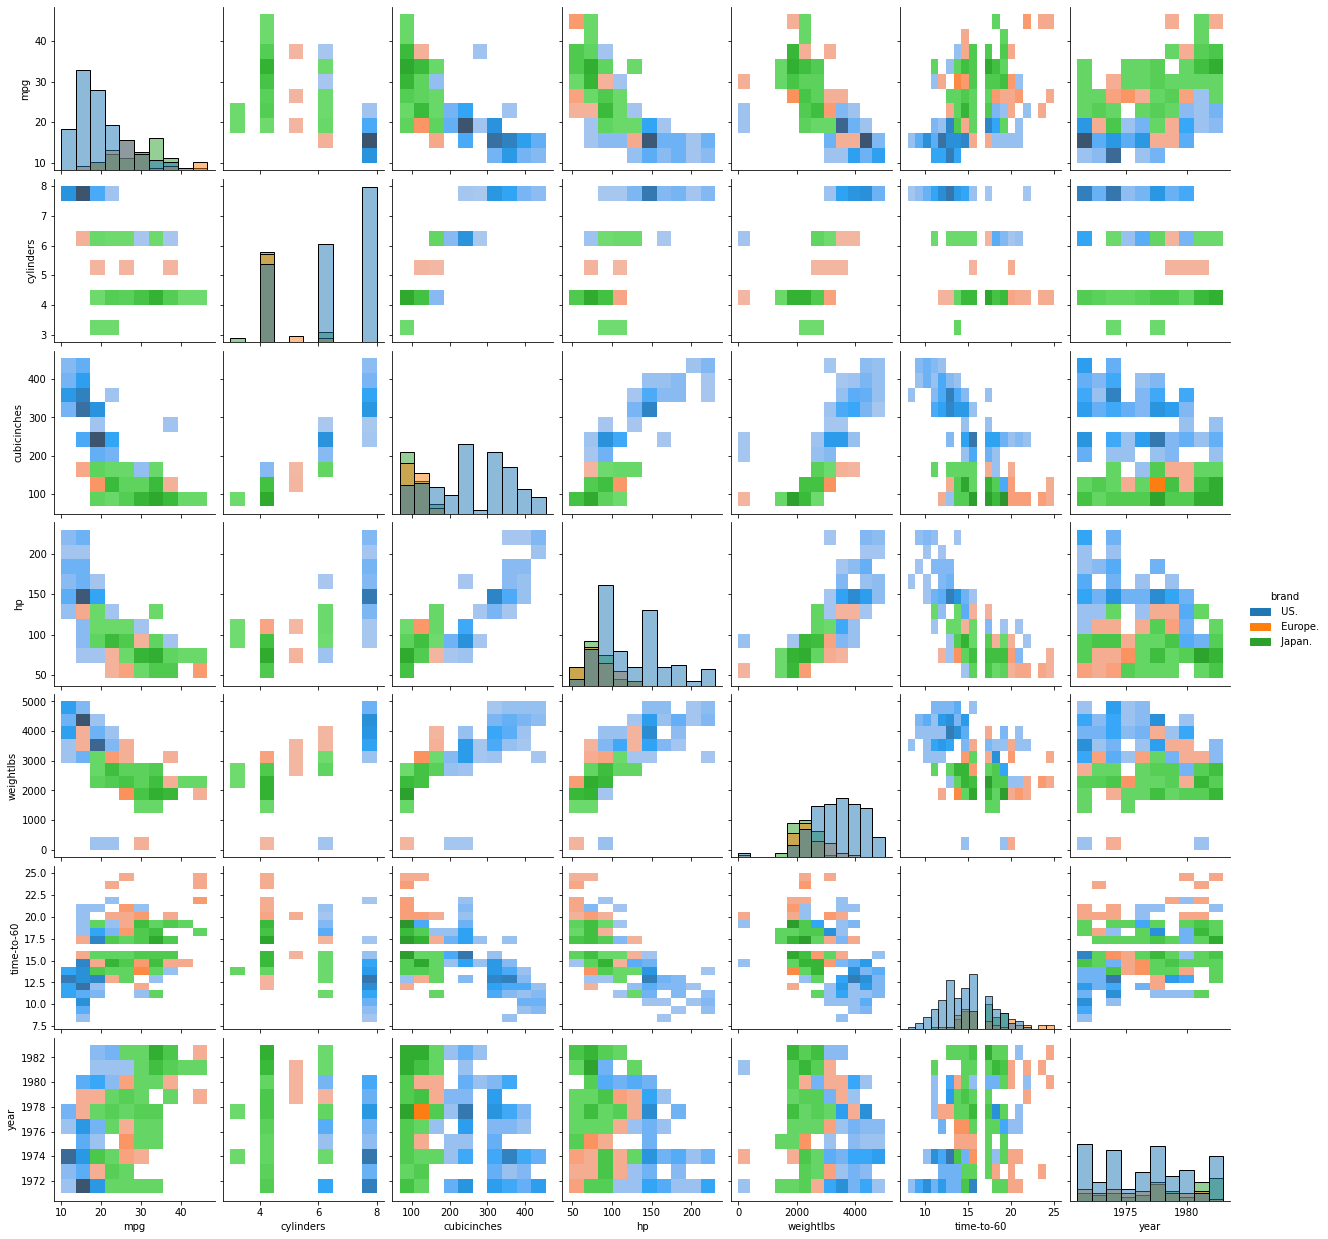

In [90]:
sns.pairplot(data, hue='brand', kind='hist')

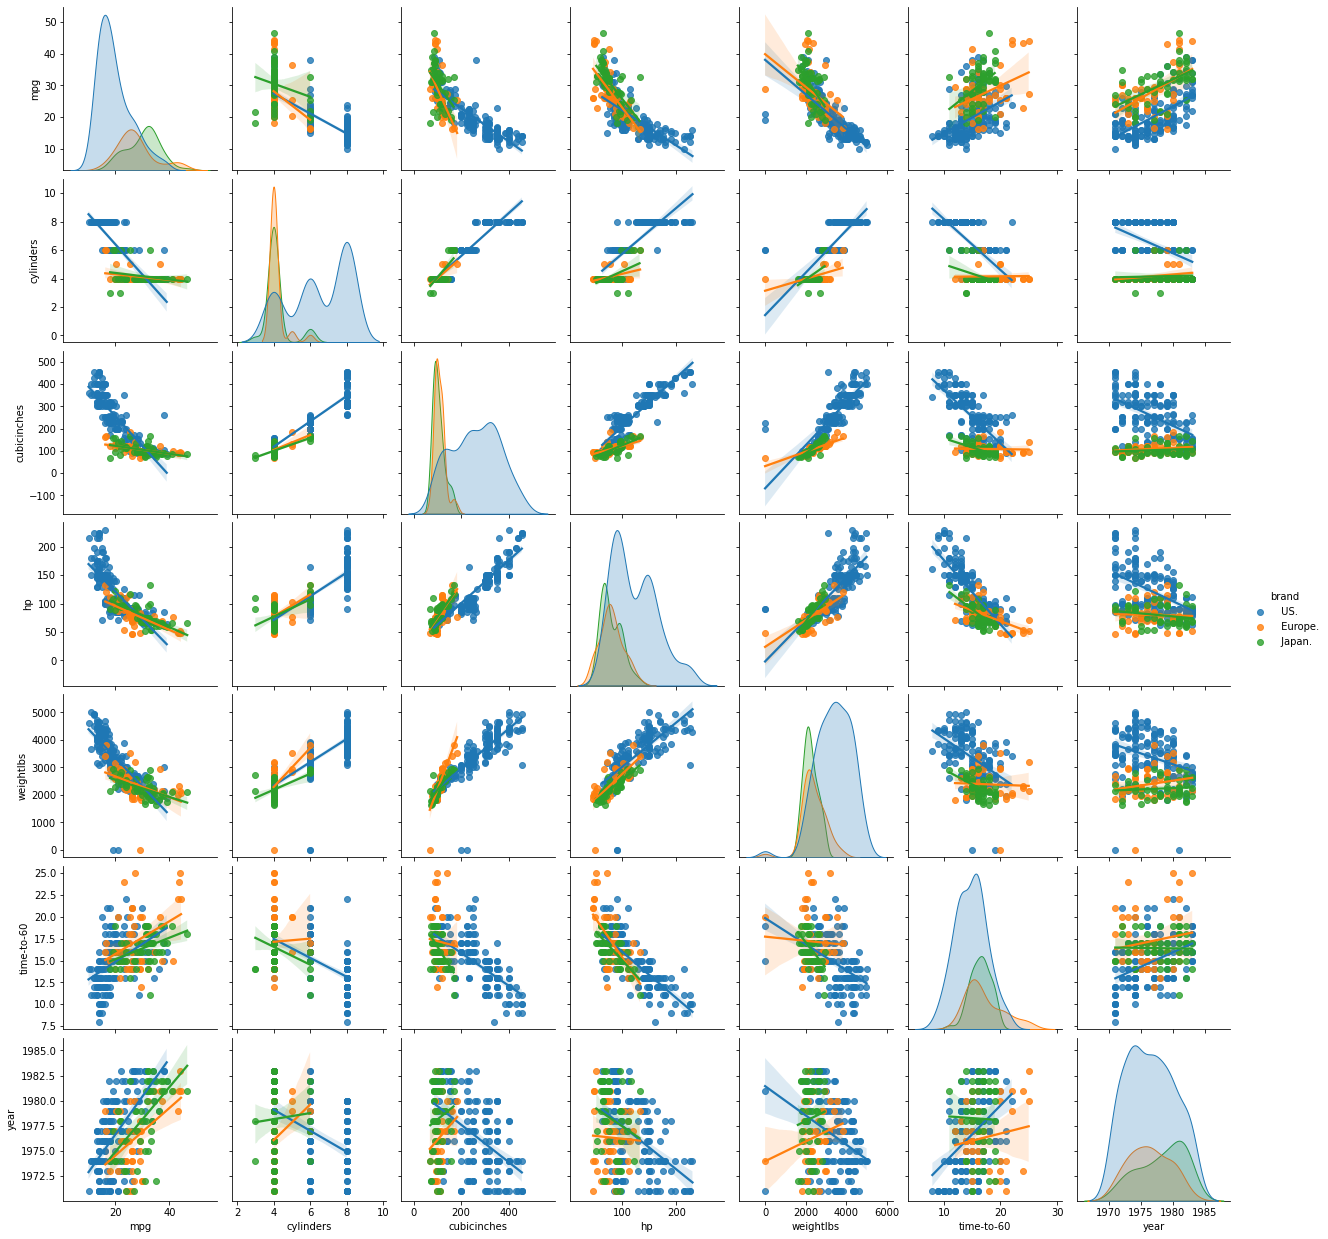

In [91]:
sns.pairplot(data, hue='brand', kind='reg')

<AxesSubplot:>

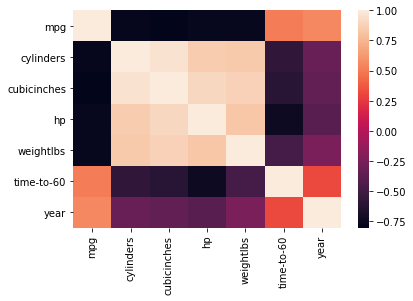

In [94]:
#Heatmap
corr = data.corr()
sns.heatmap(corr)

Text(0.5, 1.0, 'Weight in pounds')

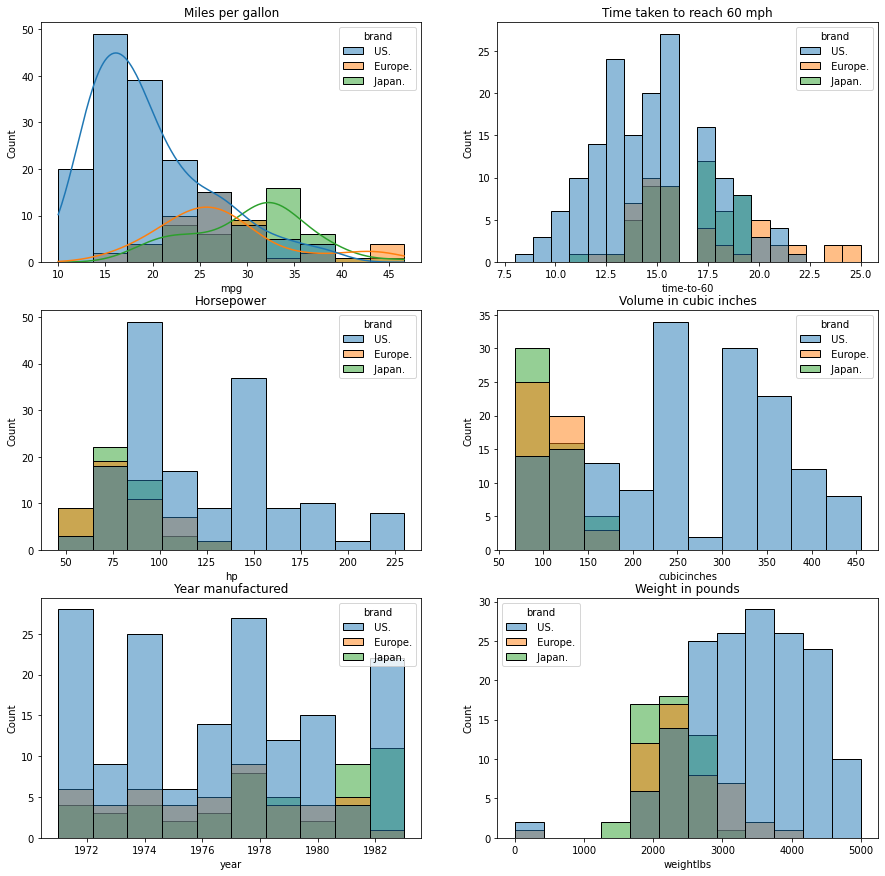

In [101]:
#Histograms using Seaborn:

fig, axes = plt.subplots(3,2, figsize =(15,15))

plt.subplot(3,2,1)
sns.histplot(x=data['mpg'], hue=data['brand'], kde=True)
plt.title('Miles per gallon')

plt.subplot(3,2,2)
sns.histplot(x=data['time-to-60'], hue=data['brand'])
plt.title('Time taken to reach 60 mph')

plt.subplot(3,2,3)
sns.histplot(x=data['hp'], hue=data['brand'])
plt.title('Horsepower')

plt.subplot(3,2,4)
sns.histplot(x=data['cubicinches'], hue=data['brand'])
plt.title('Volume in cubic inches')

plt.subplot(3,2,5)
sns.histplot(x=data['year'], hue=data['brand'])
plt.title('Year manufactured')

plt.subplot(3,2,6)
sns.histplot(x=data['weightlbs'], hue=data['brand'])
plt.title('Weight in pounds')





<AxesSubplot:xlabel='year', ylabel='mpg'>

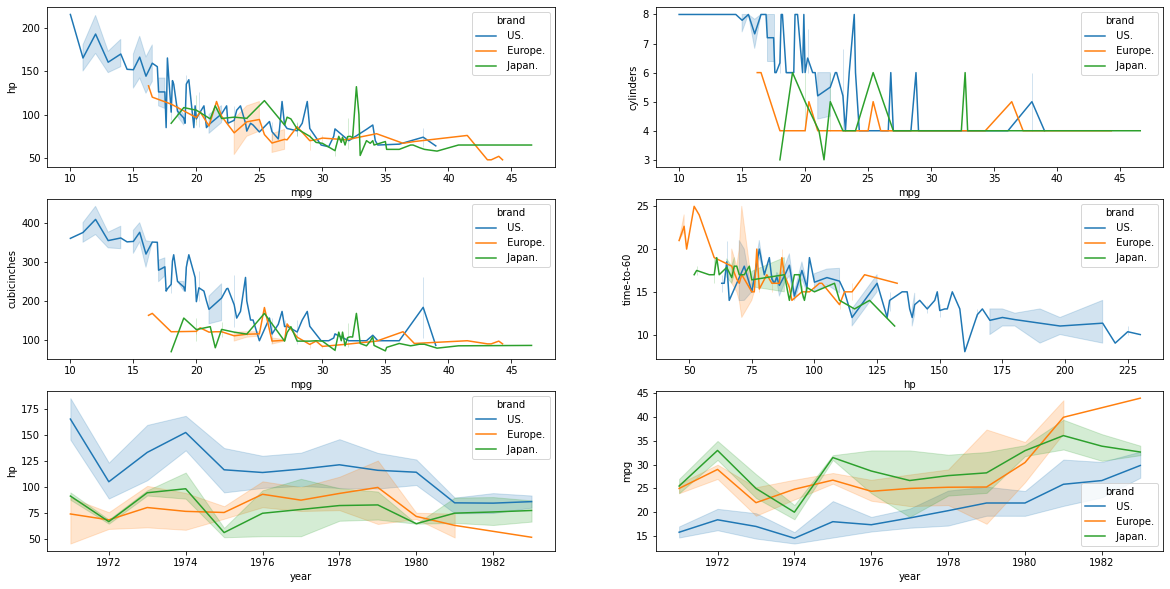

In [105]:
#Lineplots using Seaborn:
fig, axes = plt.subplots(3,2, figsize=(20,10))

plt.subplot(3,2,1)
sns.lineplot(data=data, x=data['mpg'], y=data['hp'], hue=data['brand'])

plt.subplot(3,2,2)
sns.lineplot(data=data, x=data['mpg'], y=data['cylinders'], hue=data['brand'])

plt.subplot(3,2,3)
sns.lineplot(data=data, x=data['mpg'], y=data['cubicinches'], hue=data['brand'])

plt.subplot(3,2,4)
sns.lineplot(data=data, x=data['hp'], y=data['time-to-60'], hue=data['brand'])

plt.subplot(3,2,5)
sns.lineplot(data=data, x=data['year'], y=data['hp'], hue=data['brand'])

plt.subplot(3,2,6)
sns.lineplot(data=data, x=data['year'], y=data['mpg'], hue=data['brand'])

<AxesSubplot:xlabel='year', ylabel='mpg'>

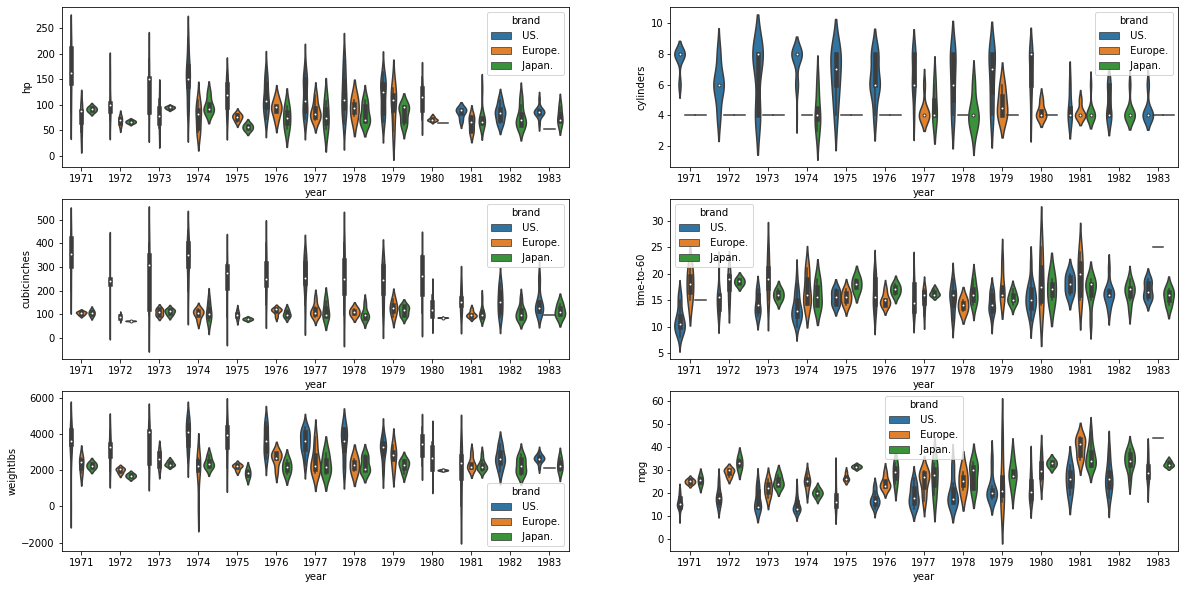

In [107]:
#Violinplots using seaborn:
fig, axes = plt.subplots(3,2, figsize=(20,10))

plt.subplot(3,2,1)
sns.violinplot(data=data, x=data['year'], y=data['hp'], hue=data['brand'])

plt.subplot(3,2,2)
sns.violinplot(data=data, x=data['year'], y=data['cylinders'], hue=data['brand'])

plt.subplot(3,2,3)
sns.violinplot(data=data, x=data['year'], y=data['cubicinches'], hue=data['brand'])

plt.subplot(3,2,4)
sns.violinplot(data=data, x=data['year'], y=data['time-to-60'], hue=data['brand'])

plt.subplot(3,2,5)
sns.violinplot(data=data, x=data['year'], y=data['weightlbs'], hue=data['brand'])

plt.subplot(3,2,6)
sns.violinplot(data=data, x=data['year'], y=data['mpg'], hue=data['brand'])

In [114]:
data.dtypes

mpg            float64
cylinders        int64
cubicinches    float64
hp               int64
weightlbs      float64
time-to-60       int64
year             int64
brand           object
dtype: object

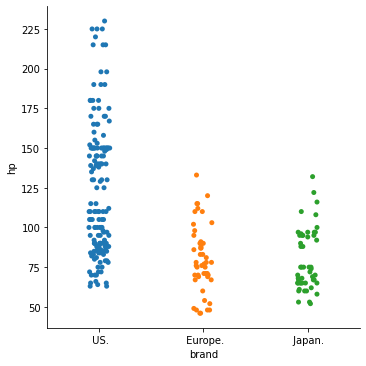

In [126]:
#Catplot for categorical data using Seaborn:

sns.catplot(data=data, x='brand', y='hp', hue='brand')

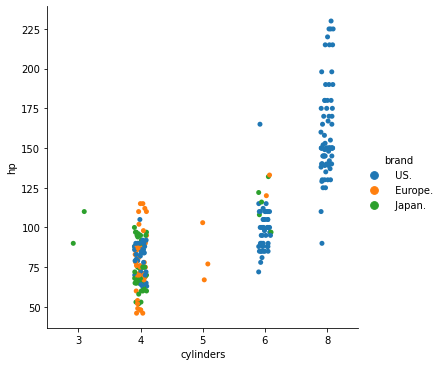

In [122]:
sns.catplot(data=data, x='cylinders', y='hp', hue='brand')

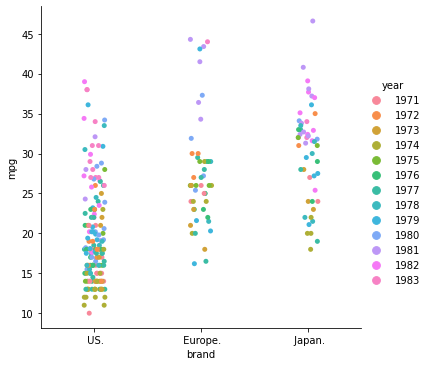

In [128]:
sns.catplot(data=data, x='brand', y='mpg',hue='year')

<AxesSubplot:ylabel='brand'>

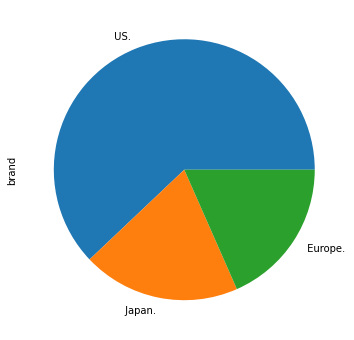

In [129]:
#Pie chart:
data['brand'].value_counts().plot.pie(figsize=(6,6))